In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('ac.csv')
temp= pd.read_csv('temp.csv')

In [3]:
print(df.head())
print(df.info())
print(df.describe())

                  0      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0  01-08-2019 00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
1  01-08-2019 00:01       NaN       NaN   NaN   NaN       NaN       NaN   
2  01-08-2019 00:02  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
3  01-08-2019 00:03       NaN       NaN   NaN   NaN       NaN       NaN   
4  01-08-2019 00:04  7.052986  9.161103   0.0   0.0  2.592095  3.800127   

       AC 7      AC 8      AC 9     AC 10     AC 11     AC 12     AC 13  \
0  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373  3.142941   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730  3.085110   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409  3.132799   

      AC 14     AC 15     AC 16     AC 17     AC 18  
0  2.749470  5.417774  4.113460  3.305072  6

In [4]:
print(temp.head())
print(temp.info())
print(temp.describe())

               Time  Temp
0  01-08-2019 03:00  30.0
1  01-08-2019 06:00  33.0
2  01-08-2019 09:00  36.0
3  01-08-2019 12:00  36.0
4  01-08-2019 15:00  36.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57 non-null     object 
 1   Temp    56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB
None
            Temp
count  56.000000
mean   34.571429
std     2.599700
min    29.000000
25%    33.000000
50%    34.000000
75%    37.000000
max    40.000000


In [5]:
df['Date']= pd.to_datetime(df['0'])
print(df['Date'].head())

0   2019-01-08 00:00:00
1   2019-01-08 00:01:00
2   2019-01-08 00:02:00
3   2019-01-08 00:03:00
4   2019-01-08 00:04:00
Name: Date, dtype: datetime64[ns]


In [6]:
df.set_index(df['Date'],inplace=True)
print(df.head())

                                    0      AC 1      AC 2  AC 3  AC 4  \
Date                                                                    
2019-01-08 00:00:00  01-08-2019 00:00  7.518632  8.788315   0.0   0.0   
2019-01-08 00:01:00  01-08-2019 00:01       NaN       NaN   NaN   NaN   
2019-01-08 00:02:00  01-08-2019 00:02  7.426114  8.940615   0.0   0.0   
2019-01-08 00:03:00  01-08-2019 00:03       NaN       NaN   NaN   NaN   
2019-01-08 00:04:00  01-08-2019 00:04  7.052986  9.161103   0.0   0.0   

                         AC 5      AC 6      AC 7      AC 8      AC 9  \
Date                                                                    
2019-01-08 00:00:00  2.617045  4.079041  2.782276  4.624447  5.222060   
2019-01-08 00:01:00       NaN       NaN       NaN       NaN       NaN   
2019-01-08 00:02:00  2.581625  3.781231  2.529366  5.057423  5.349465   
2019-01-08 00:03:00       NaN       NaN       NaN       NaN       NaN   
2019-01-08 00:04:00  2.592095  3.800127  2.332304 

In [7]:
df.drop(['0','Date'],axis=1,inplace=True)
df.dropna(axis=0,how='all',inplace=True)
df.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-01-08 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-01-08 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-01-08 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
2019-01-08 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
2019-01-08 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


In [8]:
print(df.shape)
print(df.info())
print(df.describe())

(51979, 18)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51979 entries, 2019-01-08 00:00:00 to 2019-09-30 23:59:00
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC 1    43708 non-null  float64
 1   AC 2    43711 non-null  float64
 2   AC 3    43713 non-null  float64
 3   AC 4    43704 non-null  float64
 4   AC 5    43716 non-null  float64
 5   AC 6    43717 non-null  float64
 6   AC 7    43679 non-null  float64
 7   AC 8    43704 non-null  float64
 8   AC 9    43654 non-null  float64
 9   AC 10   43690 non-null  float64
 10  AC 11   43670 non-null  float64
 11  AC 12   43713 non-null  float64
 12  AC 13   43719 non-null  float64
 13  AC 14   43696 non-null  float64
 14  AC 15   43715 non-null  float64
 15  AC 16   43710 non-null  float64
 16  AC 17   43714 non-null  float64
 17  AC 18   43723 non-null  float64
dtypes: float64(18)
memory usage: 7.5 MB
None
               AC 1          AC 2          AC 3          A

In [9]:
df.isnull().sum()

AC 1     8271
AC 2     8268
AC 3     8266
AC 4     8275
AC 5     8263
AC 6     8262
AC 7     8300
AC 8     8275
AC 9     8325
AC 10    8289
AC 11    8309
AC 12    8266
AC 13    8260
AC 14    8283
AC 15    8264
AC 16    8269
AC 17    8265
AC 18    8256
dtype: int64

In [10]:
df = df.fillna(method='bfill')
print(df.isnull().sum())


AC 1     0
AC 2     0
AC 3     0
AC 4     0
AC 5     0
AC 6     0
AC 7     0
AC 8     0
AC 9     0
AC 10    0
AC 11    0
AC 12    0
AC 13    0
AC 14    0
AC 15    0
AC 16    0
AC 17    0
AC 18    0
dtype: int64


In [11]:
df['Total']= df.sum(axis=1)
print(df['Total'].head())

Date
2019-01-08 00:00:00    65.393197
2019-01-08 00:02:00    64.762056
2019-01-08 00:04:00    65.791277
2019-01-08 00:06:00    63.779666
2019-01-08 00:08:00    61.997570
Name: Total, dtype: float64


In [12]:
pds=temp.shape[0]
temp['Date']=pd.date_range('2019-08-01',periods=pds,freq='H')
print(temp.head(),temp.tail())

               Time  Temp                Date
0  01-08-2019 03:00  30.0 2019-08-01 00:00:00
1  01-08-2019 06:00  33.0 2019-08-01 01:00:00
2  01-08-2019 09:00  36.0 2019-08-01 02:00:00
3  01-08-2019 12:00  36.0 2019-08-01 03:00:00
4  01-08-2019 15:00  36.0 2019-08-01 04:00:00                 Time  Temp                Date
52  07-08-2019 15:00  37.0 2019-08-03 04:00:00
53  07-08-2019 18:00  35.0 2019-08-03 05:00:00
54  07-08-2019 21:00  34.0 2019-08-03 06:00:00
55  08-08-2019 00:00  33.0 2019-08-03 07:00:00
56  08-08-2019 03:00   NaN 2019-08-03 08:00:00


In [17]:
temp.set_index(temp['Date'],inplace=True)
temp.drop(['Temp','Date'],axis=1,inplace=True)
print(temp.head())

                                 Time
Date                                 
2019-08-01 00:00:00  01-08-2019 03:00
2019-08-01 01:00:00  01-08-2019 06:00
2019-08-01 02:00:00  01-08-2019 09:00
2019-08-01 03:00:00  01-08-2019 12:00
2019-08-01 04:00:00  01-08-2019 15:00


In [18]:
df_min = df.copy()

In [19]:
df_h = df.resample('H').sum()
print(df_h.head())
print(df_h.isnull().sum())

                           AC 1        AC 2       AC 3       AC 4       AC 5  \
Date                                                                           
2019-01-08 00:00:00  205.245213  255.051086  54.055665  29.255579  66.960217   
2019-01-08 01:00:00  222.230520  253.772243  44.703934  55.266208  67.100296   
2019-01-08 02:00:00  220.526540  243.397378  44.469689  43.961705  59.740380   
2019-01-08 03:00:00  199.178419  237.699376  67.146196  43.220318  62.731445   
2019-01-08 04:00:00  197.929595  219.027004  52.349741  76.439507  56.164297   

                           AC 6       AC 7        AC 8        AC 9      AC 10  \
Date                                                                            
2019-01-08 00:00:00  129.089322  80.320214  144.775203  109.584198  76.679951   
2019-01-08 01:00:00  129.442455  78.308407  133.896818   91.611631  79.768370   
2019-01-08 02:00:00  126.486130  82.591836  114.041240   93.468669  84.098961   
2019-01-08 03:00:00  142.045032  9

1. Identify patterns/trends in the data?

<AxesSubplot:title={'center':'Total Power VS Time (in mins)'}, xlabel='Date'>

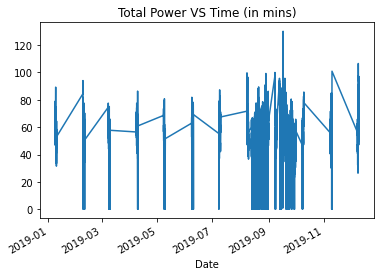

In [20]:
df_min['Total'].plot.line(title= 'Total Power VS Time (in mins)')

<AxesSubplot:title={'center':'Hourly Total Power VS Time'}, xlabel='Date'>

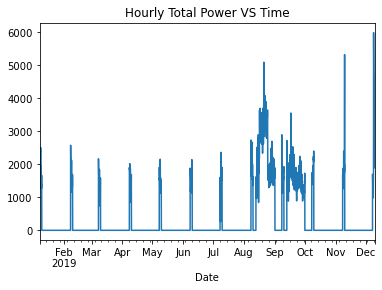

In [21]:
df_h['Total'].plot.line(title='Hourly Total Power VS Time')

<AxesSubplot:title={'center':'Daily Total Power VS Time (in days)'}, xlabel='Date'>

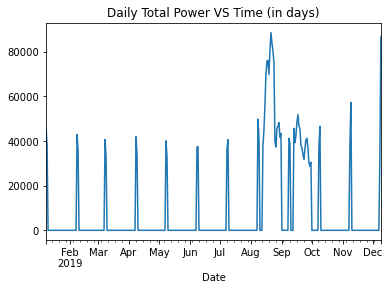

In [22]:
df_d = df.resample('D').sum()
df_d['Total'].plot.line(title='Daily Total Power VS Time (in days)')

2. Which AC was used the most/least?

In [23]:
pw=df_min.iloc[:,0:-1].sum(axis=0)
print(pw)
print(pw.idxmin(),pw.idxmax())

AC 1     123255.475213
AC 2     200892.556669
AC 3     135751.411287
AC 4     127416.586069
AC 5      72323.277403
AC 6     124107.856939
AC 7     156137.939265
AC 8     131723.702374
AC 9     166571.250737
AC 10     79927.151923
AC 11    122137.124139
AC 12    136153.482776
AC 13    221349.514742
AC 14    150230.347500
AC 15    207642.687509
AC 16    146887.338077
AC 17    218109.610535
AC 18    336287.605157
dtype: float64
AC 5 AC 18


3. Relate this power data with the outside temperature of Gurgaon.

<AxesSubplot:>

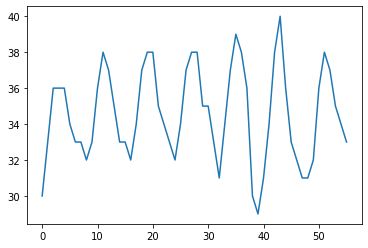

In [25]:
import pandas as pd
temp = pd.read_csv ('temp.csv')
temp['Temp'].plot.line()


<AxesSubplot:>

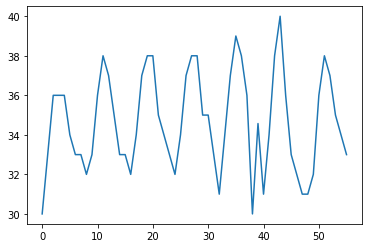

In [26]:
temp['Temp'][temp.Temp.idxmin()]= temp.Temp.mean()
temp['Temp'].plot.line()

AttributeError: 'numpy.float64' object has no attribute 'corr'

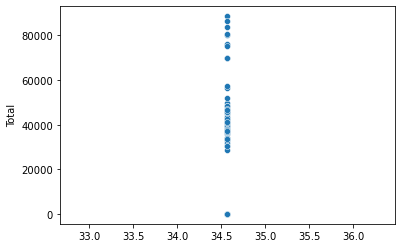

In [56]:
import seaborn as sns
sns.scatterplot(temp_d['Temp'],df_d['Total'])
print(temp_d['Temp'].corr(df_d['Total']))